In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


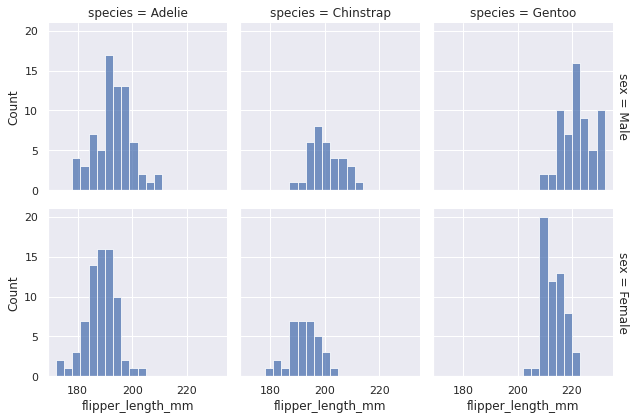

In [3]:
#sex,cabin,embarked,fare(cont)

import seaborn as sns

sns.set_theme(style="darkgrid")
pen_df = sns.load_dataset("penguins")
sns.displot(
    pen_df, x="flipper_length_mm", col="species", row="sex",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

In [4]:
pen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


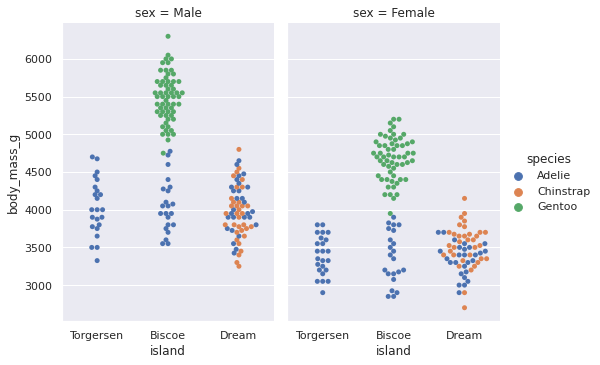

In [5]:
#catplot can show 3 categorical data and 1 continous data in a plot 
#explain:I choose island:biscoe,sex=male,species:gentoo,and body_mass_g is higher as my target
sns.catplot(x="island", y="body_mass_g", hue="species",
            col="sex", aspect=.7,
            kind="swarm", data=pen_df)

In [6]:
#do something to these target_df penguin
target_df = pen_df[(pen_df.island == "Biscoe") & (pen_df.sex == "Male") & (pen_df.species == "Gentoo")]
print(target_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 221 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            61 non-null     object 
 1   island             61 non-null     object 
 2   bill_length_mm     61 non-null     float64
 3   bill_depth_mm      61 non-null     float64
 4   flipper_length_mm  61 non-null     float64
 5   body_mass_g        61 non-null     float64
 6   sex                61 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.8+ KB
None


In [7]:
import plotly.express as px
df = px.data.tips()
fig = px.bar(df, x="sex", y="total_bill", color="smoker", barmode="group", facet_row="time", facet_col="day",
       category_orders={"day": ["Thur", "Fri", "Sat", "Sun"], "time": ["Lunch", "Dinner"]})
fig.show()

In [10]:
import plotly.express as px

fig = px.bar(pen_df, x="sex", y="body_mass_g", color="species", barmode="group",
             facet_row="island",facet_col = "species",
       category_orders={"sex": ["Male", "Female"], "species": ["Adelie", "Gentoo","Chinstrap"]})

fig.show()

#get target data 
#island:biscoe,sex=male,species:gentoo,and body_mass_g is higher as my target

In [11]:
fig.write_html("interactive_plot.html")